In [2]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Welcome to JupyROOT 6.26/08


In [3]:
def file_conversion(input_file, output_file):
    f = open(const.REF_DIR+f"/{input_file}")

    lines = []
    for line in f.readlines():
        l = line.split(",")
        temp = []
        for s in l:
            s = s.replace("'", '')
            try:
                temp.append(float(s))
            except:
                print(s)
                continue
        if len(temp)>0:
            lines.append(temp)

    lines = np.asarray(lines)
    print(lines)
    tab = Table(lines, names = ["x", "dNdE", "mass"])
    np.save(const.REF_DIR+f"/{output_file}.npy",tab)
    
def change_file(new, old):
    os.system("mv "+const.REF_DIR+f"/wino_dnde.npy "+const.REF_DIR+f"/{old}.npy" )
    os.system("mv "+const.REF_DIR+f"/{new}.npy "+const.REF_DIR+f"/wino_dnde.npy" )

In [5]:
data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [22]:
change_file("wino_dnde_res_lo", "wino_dnde_res_hi")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

In [30]:
mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=[2800], addTheta=False, averagedIRF=True, useBias=True, 
                            correction=True, bkgModel="gaus", filename="test",
                            )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2800 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/test.npy'


In [19]:
change_file("wino_dnde_res_lo", "wino_dnde_res_hi")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=mass, addTheta=False, averagedIRF=True, useBias=True, 
                            correction=True, bkgModel="gaus", filename="wino_nlo_hi_combined",
                            )

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 56000 GeV
[Log] Maximum mass : 200 TeV


  0%|          | 0/129 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/wino_nlo_hi_combined.npy'


In [113]:
ebins = np.linspace(1, 7, 101)
uls = []

change_file("wino_dnde_res_hi", "wino_dnde_res_lo")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for m in mass:
    diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
    new_ebins = 10**(ebins-diff)
    
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=[m], addTheta=False, averagedIRF=True, useBias=True, statistic="binned",
                            correction=True, bkgModel="gaus", filename=False, energyEdges=new_ebins,
                            )
    uls.append(mle)
    
change_file("wino_dnde_res_lo", "wino_dnde_res_hi")

data = WINOspectra(return_table=True)

mass = list(set(data["mass"]))

mass.sort()

for m in mass:
    diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
    new_ebins = 10**(ebins-diff)
    
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=[m], addTheta=False, averagedIRF=True, useBias=True, statistic="binned",
                            correction=True, bkgModel="gaus", filename=False, energyEdges=new_ebins,
                            )
    uls.append(mle)


[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 1 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1000 GeV
[Log] Maximum mass : 1 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1250 GeV
[Log] Maximum mass : 1 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1500 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 1750 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2000 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2250 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2500 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2750 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3000 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3250 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3500 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3750 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4000 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4250 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4500 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4750 GeV
[Log] Maximum mass : 5 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5000 GeV
[Log] Maximum mass : 5 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5250 GeV
[Log] Maximum mass : 5 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5500 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5750 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 6000 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 6250 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 6500 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 6750 GeV
[Log] Maximum mass : 7 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7000 GeV
[Log] Maximum mass : 7 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7250 GeV
[Log] Maximum mass : 7 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7500 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7750 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8000 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8250 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8500 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8750 GeV
[Log] Maximum mass : 9 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9000 GeV
[Log] Maximum mass : 9 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9250 GeV
[Log] Maximum mass : 9 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9500 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9750 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 10000 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 10500 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 11000 GeV
[Log] Maximum mass : 11 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 11500 GeV
[Log] Maximum mass : 12 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 12000 GeV
[Log] Maximum mass : 12 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 12500 GeV
[Log] Maximum mass : 12 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 13000 GeV
[Log] Maximum mass : 13 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 13500 GeV
[Log] Maximum mass : 14 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 14000 GeV
[Log] Maximum mass : 14 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 14500 GeV
[Log] Maximum mass : 14 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 15000 GeV
[Log] Maximum mass : 15 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 15500 GeV
[Log] Maximum mass : 16 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 16000 GeV
[Log] Maximum mass : 16 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 16500 GeV
[Log] Maximum mass : 16 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 17000 GeV
[Log] Maximum mass : 17 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 17500 GeV
[Log] Maximum mass : 18 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 18000 GeV
[Log] Maximum mass : 18 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 18500 GeV
[Log] Maximum mass : 18 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 19000 GeV
[Log] Maximum mass : 19 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 19500 GeV
[Log] Maximum mass : 20 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 20000 GeV
[Log] Maximum mass : 20 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 20500 GeV
[Log] Maximum mass : 20 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 21000 GeV
[Log] Maximum mass : 21 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 21500 GeV
[Log] Maximum mass : 22 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 22000 GeV
[Log] Maximum mass : 22 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 22500 GeV
[Log] Maximum mass : 22 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 23000 GeV
[Log] Maximum mass : 23 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 23500 GeV
[Log] Maximum mass : 24 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 24000 GeV
[Log] Maximum mass : 24 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 24500 GeV
[Log] Maximum mass : 24 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 25000 GeV
[Log] Maximum mass : 25 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 25500 GeV
[Log] Maximum mass : 26 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 26000 GeV
[Log] Maximum mass : 26 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 26500 GeV
[Log] Maximum mass : 26 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 27000 GeV
[Log] Maximum mass : 27 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 27500 GeV
[Log] Maximum mass : 28 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 28000 GeV
[Log] Maximum mass : 28 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 28500 GeV
[Log] Maximum mass : 28 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 29000 GeV
[Log] Maximum mass : 29 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 29500 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30500 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31000 GeV
[Log] Maximum mass : 31 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31500 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 32000 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 32500 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 33000 GeV
[Log] Maximum mass : 33 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 33500 GeV
[Log] Maximum mass : 34 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 34000 GeV
[Log] Maximum mass : 34 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 34500 GeV
[Log] Maximum mass : 34 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 35000 GeV
[Log] Maximum mass : 35 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 35500 GeV
[Log] Maximum mass : 36 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 36000 GeV
[Log] Maximum mass : 36 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 36500 GeV
[Log] Maximum mass : 36 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 37000 GeV
[Log] Maximum mass : 37 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 37500 GeV
[Log] Maximum mass : 38 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 38000 GeV
[Log] Maximum mass : 38 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 38500 GeV
[Log] Maximum mass : 38 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 39000 GeV
[Log] Maximum mass : 39 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 39500 GeV
[Log] Maximum mass : 40 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 40000 GeV
[Log] Maximum mass : 40 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 40500 GeV
[Log] Maximum mass : 40 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 41000 GeV
[Log] Maximum mass : 41 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 41500 GeV
[Log] Maximum mass : 42 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 42000 GeV
[Log] Maximum mass : 42 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 42500 GeV
[Log] Maximum mass : 42 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 43000 GeV
[Log] Maximum mass : 43 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 43500 GeV
[Log] Maximum mass : 44 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 44000 GeV
[Log] Maximum mass : 44 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 44500 GeV
[Log] Maximum mass : 44 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 45000 GeV
[Log] Maximum mass : 45 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 45500 GeV
[Log] Maximum mass : 46 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 46000 GeV
[Log] Maximum mass : 46 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 46500 GeV
[Log] Maximum mass : 46 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 47000 GeV
[Log] Maximum mass : 47 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 47500 GeV
[Log] Maximum mass : 48 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 48000 GeV
[Log] Maximum mass : 48 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 48500 GeV
[Log] Maximum mass : 48 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 49000 GeV
[Log] Maximum mass : 49 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 49500 GeV
[Log] Maximum mass : 50 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 50000 GeV
[Log] Maximum mass : 50 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 50500 GeV
[Log] Maximum mass : 50 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 51000 GeV
[Log] Maximum mass : 51 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 51500 GeV
[Log] Maximum mass : 52 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 52000 GeV
[Log] Maximum mass : 52 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 52500 GeV
[Log] Maximum mass : 52 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 53000 GeV
[Log] Maximum mass : 53 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 53500 GeV
[Log] Maximum mass : 54 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 54000 GeV
[Log] Maximum mass : 54 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 54500 GeV
[Log] Maximum mass : 54 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 55000 GeV
[Log] Maximum mass : 55 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 55500 GeV
[Log] Maximum mass : 56 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dtak/Research/DarkMatter/RefData/wino_dnde.npy'

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
 

mv: rename /Users/dtak/Research/DarkMatter/RefData//wino_dnde.npy to /Users/dtak/Research/DarkMatter/RefData//wino_dnde_res_lo.npy: No such file or directory
mv: rename /Users/dtak/Research/DarkMatter/RefData//wino_dnde_res_lo.npy to /Users/dtak/Research/DarkMatter/RefData//wino_dnde.npy: No such file or directory


In [127]:
uls=uls.tolist()

In [ ]:
ebins = np.linspace(1, 7, 61)
uls = []
for m in mass[::5]:
    diff = ebins[np.argmin(abs(m-10**ebins))]-np.log10(m)
    new_ebins = 10**(ebins-diff)
    
    mle = Likelihood.combinedUpperLimits("wino", package="EventDisplay", dwarfs=const.ListOfDwarf, method=2, ext=True, DM_spectra="WINO",
                            mass=[m], addTheta=False, averagedIRF=True, useBias=True, 
                            correction=True, bkgModel="gaus", filename=False,
                            )
    if np.size(mle) == 2:
        uls.append(mle)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 800 GeV
[Log] Maximum mass : 1 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 2000 GeV
[Log] Maximum mass : 2 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 3250 GeV
[Log] Maximum mass : 3 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 4500 GeV
[Log] Maximum mass : 4 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 5750 GeV
[Log] Maximum mass : 6 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 7000 GeV
[Log] Maximum mass : 7 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 8250 GeV
[Log] Maximum mass : 8 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : wino
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 9500 GeV
[Log] Maximum mass : 10 TeV


  0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
5*

30

In [29]:
np.save("6",uls)

In [28]:
np.load("10.npy")

array([[[ 800.        ,  -25.46561711]],

       [[2000.        ,  -25.2183838 ]]])

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.


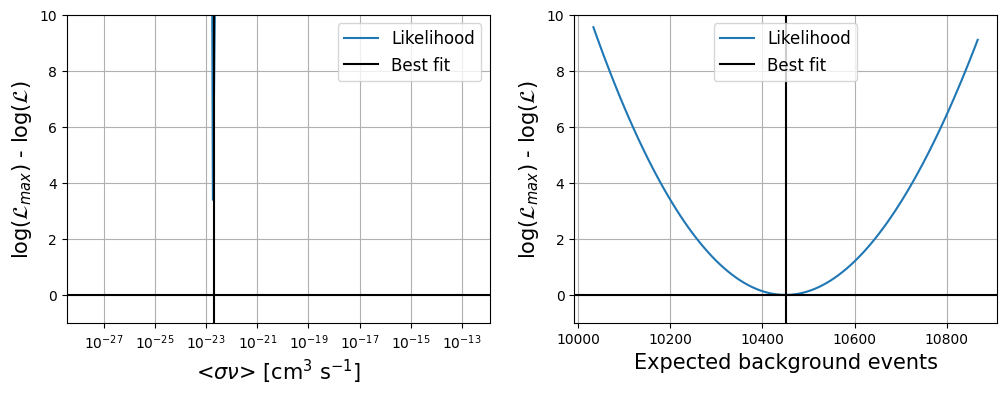

[Log, Error] The upper limit is not estimated (M=2.000 TeV).
[Log, Result] TS = 766.50 (M=2000 GeV)
[Log, Result] <σν> = 10^(-22.680 +/- 0.027)
[Log, Result] b = 10450 +/- 139 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = 3.54 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.041) (equivalent to 9.11e-25)
[Log, Result] b = 11217 +/- 150 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.370) (e

[Log] Step 3: A source model is loaded.
[Log] Step 4: Assigning probabilities for each event...

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
      Energy      
------------------
62290.446171057825


[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Result] TS = -0.00 (M=2000 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(-24.779) (equivalent to 1.66e-25)
[Log, Result] b = 11290 +/- 138 (null value: 11291)
[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: Assigning probabilities for each event...

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
      Energy      
------------------
62290.446171057825


[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.
[Log, Resul

In [103]:
sig = []
for i in np.arange(10, 200, step=10):
    mle = Likelihood.MLE("Segue_1", 2000, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.geomspace(10, 10**7, i))
    mle.minuit(method=2)
    sig.append(mle.signu_ul)

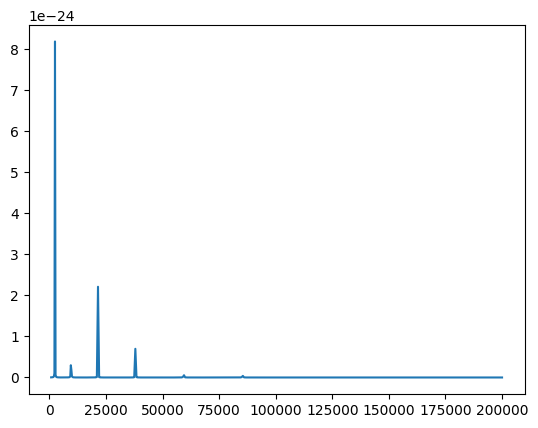

In [76]:
plt.plot(data["mass"], data["signu"])

In [34]:
10**-24.59216427

2.557618295920588e-25

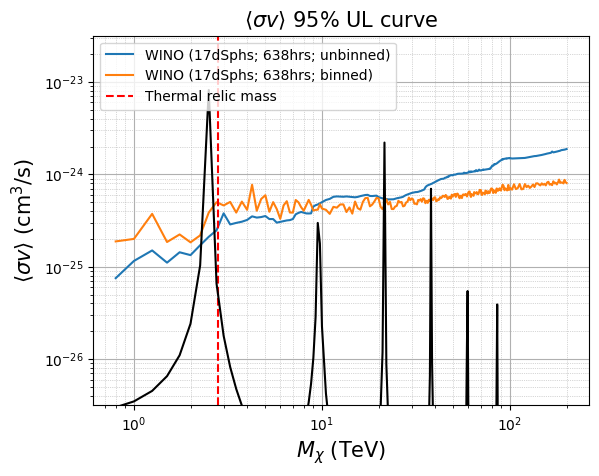

In [33]:
plotULcurve("wino_nlo_lo_combined", add_input="wino_nlo_hi_combined", label="WINO (17dSphs; 638hrs; unbinned)", units="TeV")
plotULcurve("wino_nlo_matt_binned", label="WINO (17dSphs; 638hrs; binned)", units="TeV")
plt.axvline(2.8, color="r", ls="--", label="Thermal relic mass")
plotPredictedLine(units="TeV")
#plt.axhline(10**-24.59216427)
plt.legend(loc=2, fontsize=10)

# Check John's Idea

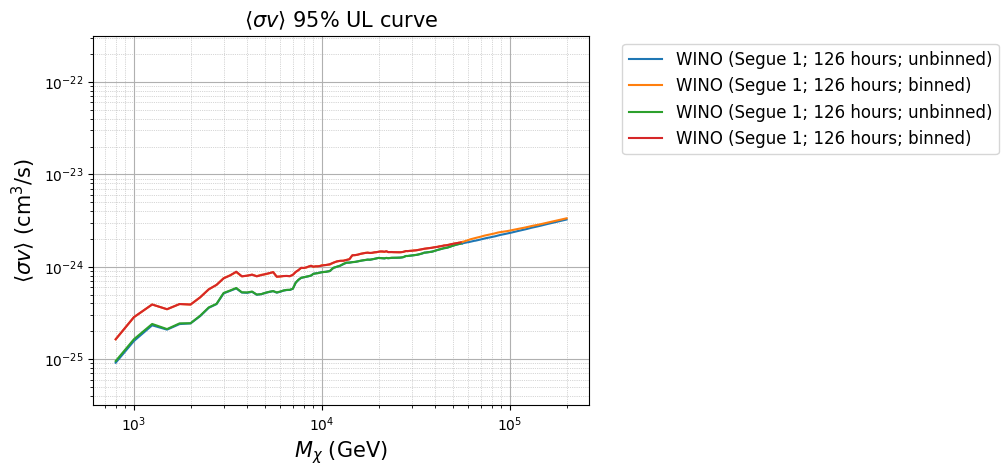

In [128]:
plotULcurve("wino_nlo", label="WINO (Segue 1; 126 hours; unbinned)")
plotULcurve("wino_nlo_lo_binned", label="WINO (Segue 1; 126 hours; binned)")
plotULcurve("wino_nlo_lo_c", label="WINO (Segue 1; 126 hours; unbinned)")
plotULcurve("wino_nlo_lo_binned_c", label="WINO (Segue 1; 126 hours; binned)")

plotULcurve("wino_nlo_hi", color="C0")
plotULcurve("wino_nlo_binned_hi", color="C1", addRelic=True)


# Check # of bins 

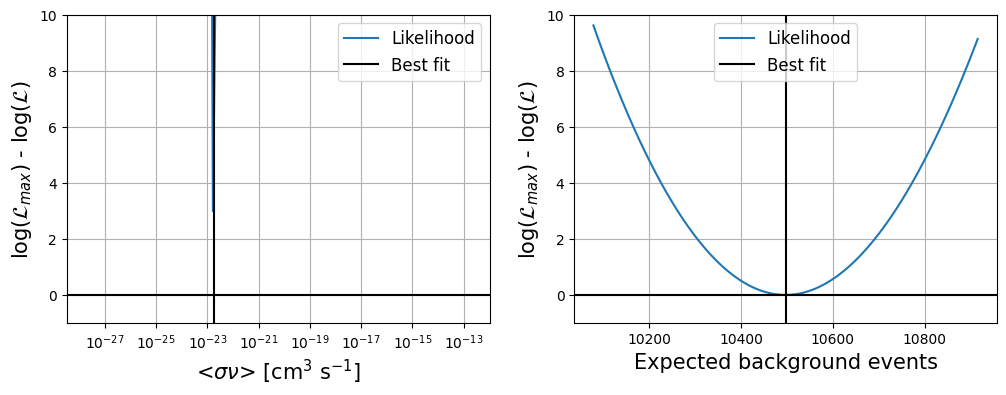

[Log, Error] The upper limit is not estimated (M=2.800 TeV).


In [37]:
sig_3 = []
for i in np.arange(10, 201, step=10):
    mle = Likelihood.MLE("Segue_1", 2800, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.geomspace(10, 10**7, i), verbose=False)
    mle.minuit(method=2)
    sig_3.append(mle.signu_ul)

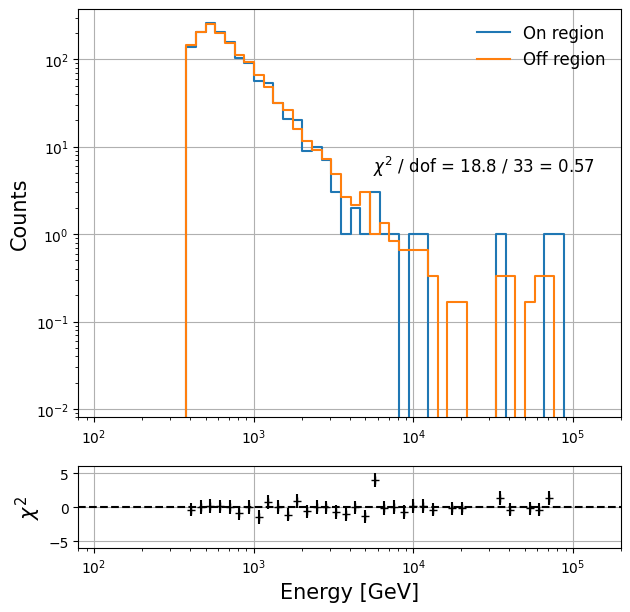

In [140]:
Likelihood.EventDisplay.plotData("UMa_II", ext=True, energyEdges = np.geomspace(10, 10**7, 100))

In [36]:
plt.plot(np.arange(10, 201, step=5), sig, label="2 TeV")
plt.plot(np.arange(10, 201, step=5), sig_3, label="3 TeV")

NameError: name 'sig' is not defined

# Shift bins

In [126]:
sig_s = []
for i in range(60):
    mle = Likelihood.MLE("Segue_1", 3000, DM_spectra="wino", channel="wino", ext=True, bkgModel="gaus", 
                     energyEdges = np.logspace(1+0.001*i, 7+0.01*i, 101), verbose=False)
    mle.minuit(method=2)
    sig_s.append(mle.signu_ul)

ERROR! Session/line number was not unique in database. History logging moved to new session 2061


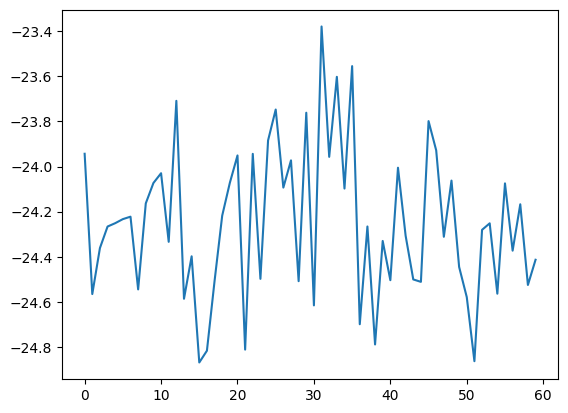

In [127]:
plt.plot(range(60), sig_s)